<a href="https://colab.research.google.com/github/Saeed2761989/I02-Similarity-based-learning/blob/main/W25_I03_Probability_based_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1: Understand the data

**Step 1: Import Necessary Libraries**

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

**Step 2: Load the Data**

In [28]:
pd.set_option('display.max_columns', None)
url = 'https://raw.githubusercontent.com/dearbharat/datasets/refs/heads/main/hospital.csv'
df = pd.read_csv(url)
df.head()

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Hospital Ownership,Emergency Services,Hospital overall rating,Mortality national comparison,Safety of care national comparison,Readmission national comparison,Patient experience national comparison,Effectiveness of care national comparison,Timeliness of care national comparison,Efficient use of medical imaging national comparison,MORT_30_AMI_Score,MORT_30_CABG_Score,MORT_30_COPD_Score,MORT_30_HF_Score,MORT_30_PN_Score,MORT_30_STK_Score,rating_group,READM_30_AMI_Score,READM_30_CABG_Score,READM_30_COPD_Score,READM_30_HF_Score,READM_30_HIP_KNEE_Score,READM_30_HOSP_WIDE_Score,READM_30_PN_Score,READM_30_STK_Score,TIME_OP_21_Score,TIME_OP_5_Score,EFF_EDV_Score,EFF_ED_1b_Score,EFF_ED_2b_Score,EFF_IMM_2_Score,EFF_IMM_3_OP_27_FAC_ADHPCT_Score,EFF_OP_18b_Score,EFF_OP_20_Score,EFF_OP_22_Score,EFF_OP_29_Score,EFF_OP_30_Score,EFF_OP_4_Score,EFF_PC_01_Score,EFF_STK_1_Score,EFF_STK_10_Score,EFF_STK_2_Score,EFF_STK_4_Score,EFF_STK_5_Score,EFF_STK_6_Score,EFF_VTE_1_Score,EFF_VTE_2_Score,EFF_VTE_3_Score,EFF_VTE_5_Score,EFF_VTE_6_Score,EXP_H_CLEAN_STAR_RATING_Score,EXP_H_COMP_1_STAR_RATING_Score,EXP_H_COMP_2_STAR_RATING_Score,EXP_H_COMP_3_STAR_RATING_Score,EXP_H_COMP_4_STAR_RATING_Score,EXP_H_COMP_5_STAR_RATING_Score,EXP_H_COMP_6_STAR_RATING_Score,EXP_H_COMP_7_STAR_RATING_Score,EXP_H_HSP_RATING_STAR_RATING_Score,EXP_H_QUIET_STAR_RATING_Score,EXP_H_RECMND_STAR_RATING_Score,EXP_H_STAR_RATING_Score,SAFETY_COMP_HIP_KNEE_Score,SAFETY_PSI_12_POSTOP_PULMEMB_DVT_Score,SAFETY_PSI_13_POST_SEPSIS_Score,SAFETY_PSI_14_POSTOP_DEHIS_Score,SAFETY_PSI_15_ACC_LAC_Score,SAFETY_PSI_3_ULCER_Score,SAFETY_PSI_4_SURG_COMP_Score,SAFETY_PSI_6_IAT_PTX_Score,SAFETY_PSI_7_CVCBI_Score,SAFETY_PSI_90_SAFETY_Score,SAFETY_HAI_1_SIR_Score,SAFETY_HAI_1a_SIR_Score,SAFETY_HAI_2_SIR_Score,SAFETY_HAI_2a_SIR_Score,SAFETY_HAI_3_SIR_Score,SAFETY_HAI_4_SIR_Score,SAFETY_HAI_5_SIR_Score,SAFETY_HAI_6_SIR_Score,MED_OP_10_Score,MED_OP_11_Score,MED_OP_13_Score,MED_OP_14_Score,MED_OP_8_Score,MED_OP_9_Score
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Government,Yes,3,1,2,1,0,1,1,1,-12.500000,-4.200000,-9.3,-12.4,-15.5,-15.40000,1.0,16.500000,15.10000,21.1,21.4,5.100000,15.4,18.7,12.700000,-99.0,-8.255205,-2.0,-269.0,-68.0,97.0,81.0,-196.0,-65.0,-4.0,72.820855,82.0,96.12304,-0.000000,99.00000,96.000000,100.000000,67.000000,98.00000,99.000000,97.0,99.00000,91.000000,90.000000,-0.000000,2.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,3.00000,-3.800000,-3.320000,-5.720000,-2.720000,-1.35,-0.07,-168.260000,-0.36,-0.12,-0.68,-1.740000,-2.433000,-1.427000,-2.307000,-1.87000,-0.000000,-0.422000,-0.787,-6.4,-0.900000,-7.100000,-2.400000,-38.100000,-6.9
1,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,Government,Yes,3,0,1,2,1,1,2,0,-16.000000,-3.331371,-7.6,-15.5,-20.8,-15.50000,1.0,16.700000,14.40761,18.0,21.9,5.700000,14.9,16.4,13.400000,-60.0,-12.000000,-3.0,-243.0,-71.0,99.0,83.0,-117.0,-27.0,-2.0,92.000000,92.0,99.00000,-1.000000,98.00000,99.000000,100.000000,89.591422,99.00000,88.000000,95.0,94.00000,100.000000,100.000000,-2.030869,2.000000,3.000000,4.000000,3.000000,3.000000,3.000000,4.000000,2.000000,4.000000,4.000000,3.000000,3.00000,-3.000000,-5.630000,-9.180000,-2.110000,-1.25,-0.14,-179.050000,-0.47,-0.11,-0.85,-1.062000,-0.648000,-0.456000,-0.698000,-0.38600,-0.871177,-1.388000,-0.405,-13.3,-10.200000,-5.300000,-4.000000,-42.800000,-5.1
2,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,LAUDERDALE,2567688400,Government,Yes,2,0,1,1,0,1,2,1,-16.700000,-4.100000,-7.1,-15.6,-18.2,-17.90000,0.0,16.100000,15.20000,19.8,20.6,5.000000,15.4,17.9,12.000000,-58.0,-8.255205,-2.0,-217.0,-78.0,100.0,87.0,-133.0,-10.0,-1.0,70.000000,88.0,96.12304,-0.000000,99.00000,100.000000,100.000000,89.591422,99.00000,97.000000,98.0,89.00000,86.000000,92.000000,-0.

**Step 3: Understand the Data**

In [29]:
df.shape

(3057, 94)

Below cell provides an overview of the dataset by displaying the number of unique hospitals, states, cities, and counties. It also lists the different types of hospital ownership and emergency service options available in the dataset.

In [30]:
print(f"# of Hospital: {df['Provider ID'].nunique()}")
print(f"# of States: {df['State'].nunique()}")
print(f"# of Cities: {df['City'].nunique()}")
print(f"# of Counties: {df['County Name'].nunique()}")

print(f"# of Hospital Ownership Types: {df['Hospital Ownership'].nunique()}")
print(f"  Types: {', '.join(df['Hospital Ownership'].unique())}")

print(f"# of Emergency Service Options: {df['Emergency Services'].nunique()}")
print(f"  Options: {', '.join(df['Emergency Services'].unique())}")

# of Hospital: 3057
# of States: 51
# of Cities: 1874
# of Counties: 1038
# of Hospital Ownership Types: 3
  Types: Government, Voluntary, Others
# of Emergency Service Options: 2
  Options: Yes, No


Below cell shows the distribution of values for various hospital quality measures. For each measure, it lists the minimum, maximum, and number of unique values, along with a sorted list of the unique values observed in the data.

In [31]:
df[[
    'Hospital overall rating',
    'Mortality national comparison',
    'Safety of care national comparison',
    'Readmission national comparison',
    'Patient experience national comparison',
    'Effectiveness of care national comparison',
    'Timeliness of care national comparison',
    'Efficient use of medical imaging national comparison'
]].agg(['min', 'max', 'nunique']).T.assign(
    unique_values=df[[
        'Hospital overall rating',
        'Mortality national comparison',
        'Safety of care national comparison',
        'Readmission national comparison',
        'Patient experience national comparison',
        'Effectiveness of care national comparison',
        'Timeliness of care national comparison',
        'Efficient use of medical imaging national comparison'
    ]].apply(lambda x: sorted(x.unique())).T.values
)


,min,max,nunique,unique_values
Hospital overall rating,1,5,5,"[1, 2, 3, 4, 5]"
Mortality national comparison,0,2,3,"[0, 1, 2]"
Safety of care national comparison,0,2,3,"[0, 1, 2]"
Readmission national comparison,0,2,3,"[0, 1, 2]"
Patient experience national comparison,0,2,3,"[0, 1, 2]"
Effectiveness of care national comparison,0,2,3,"[0, 1, 2]"
Timeliness of care national comparison,0,2,3,"[0, 1, 2]"
Efficient use of medical imaging national comparison,0,2,3,"[0, 1, 2]"


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3057 entries, 0 to 3056
Data columns (total 94 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Provider ID                                           3057 non-null   int64  
 1   Hospital Name                                         3057 non-null   object 
 2   Address                                               3057 non-null   object 
 3   City                                                  3057 non-null   object 
 4   State                                                 3057 non-null   object 
 5   ZIP Code                                              3057 non-null   int64  
 6   County Name                                           3057 non-null   object 
 7   Phone Number                                          3057 non-null   int64  
 8   Hospital Ownership                                    3057

In [33]:
df.isnull().sum()

,0
Provider ID,0
Hospital Name,0
Address,0
City,0
State,0
...,...
MED_OP_11_Score,0
MED_OP_13_Score,0
MED_OP_14_Score,0
MED_OP_8_Score,0


In [34]:
df['Hospital overall rating'].describe()

,Hospital overall rating
count,3057.000000
mean,3.025842
std,0.869600
min,1.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,5.000000


**Step 4: Analyze Key Variables and Visualization**

Distribution of Hospital Overall Ratings is normall.

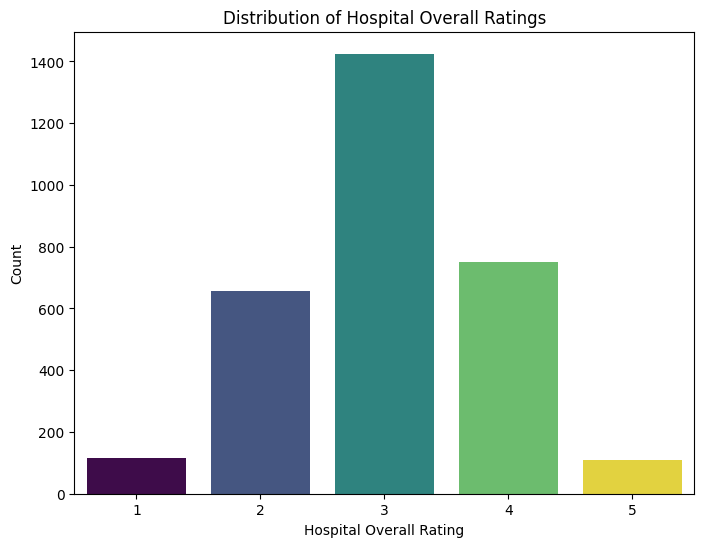

In [35]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Hospital overall rating', data=df, palette='viridis',
              hue = df['Hospital overall rating'], legend=False)
plt.title('Distribution of Hospital Overall Ratings')
plt.xlabel('Hospital Overall Rating')
plt.ylabel('Count')
plt.show()

Hospital Ratings by State

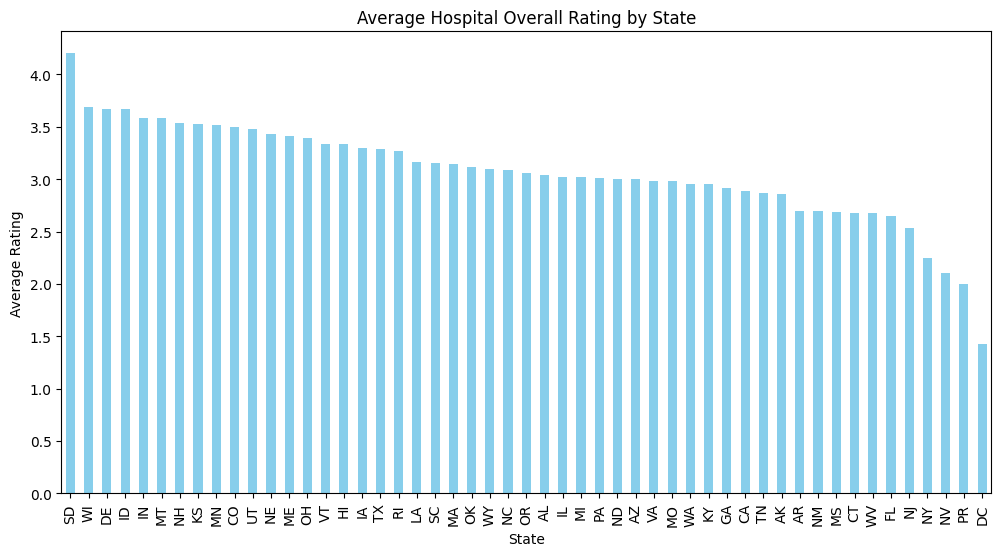

In [36]:
state_ratings = df.groupby(
    'State')['Hospital overall rating'].mean().sort_values(ascending=False)


plt.figure(figsize=(12, 6))
state_ratings.plot(kind='bar', color='skyblue')
plt.title('Average Hospital Overall Rating by State')
plt.xlabel('State')
plt.ylabel('Average Rating')
plt.show()

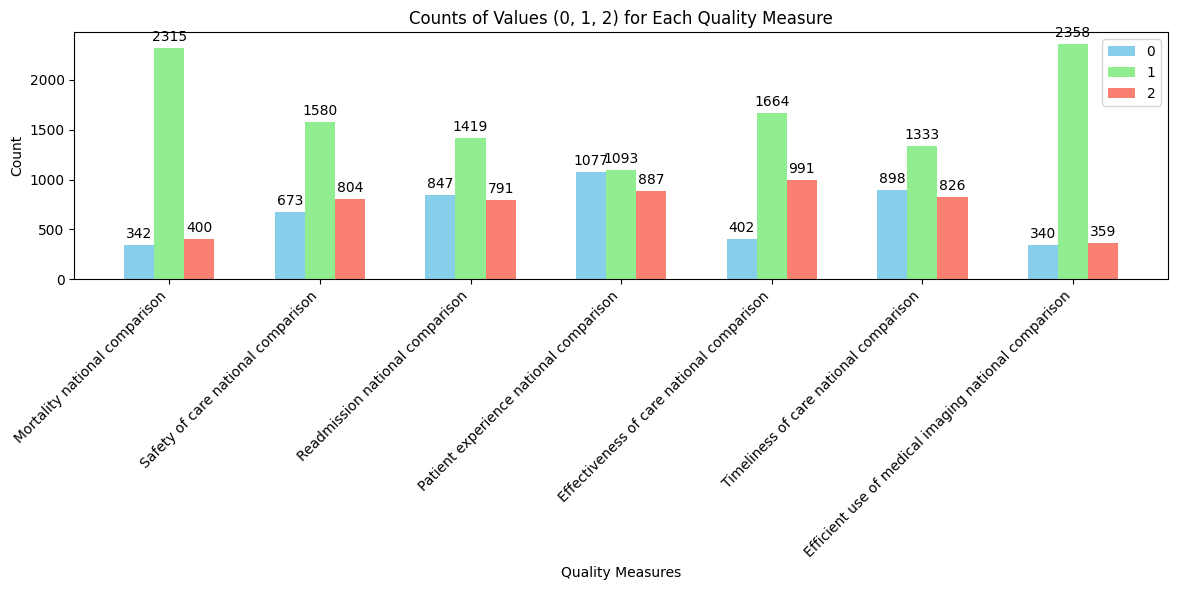

In [37]:
columns = [
    'Mortality national comparison',
    'Safety of care national comparison',
    'Readmission national comparison',
    'Patient experience national comparison',
    'Effectiveness of care national comparison',
    'Timeliness of care national comparison',
    'Efficient use of medical imaging national comparison'
]

counts = pd.DataFrame(index=[0, 1, 2])


for col in columns:
    counts[col] = df[col].value_counts().sort_index()


x = np.arange(len(columns))
width = 0.2

fig, ax = plt.subplots(figsize=(12, 6))


rects1 = ax.bar(x - width, counts.loc[0], width, label='0', color='skyblue')
rects2 = ax.bar(x, counts.loc[1], width, label='1', color='lightgreen')
rects3 = ax.bar(x + width, counts.loc[2], width, label='2', color='salmon')


ax.set_xlabel('Quality Measures')
ax.set_ylabel('Count')
ax.set_title('Counts of Values (0, 1, 2) for Each Quality Measure')
ax.set_xticks(x)
ax.set_xticklabels(columns, rotation=45, ha='right')
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)


plt.tight_layout()


plt.show()

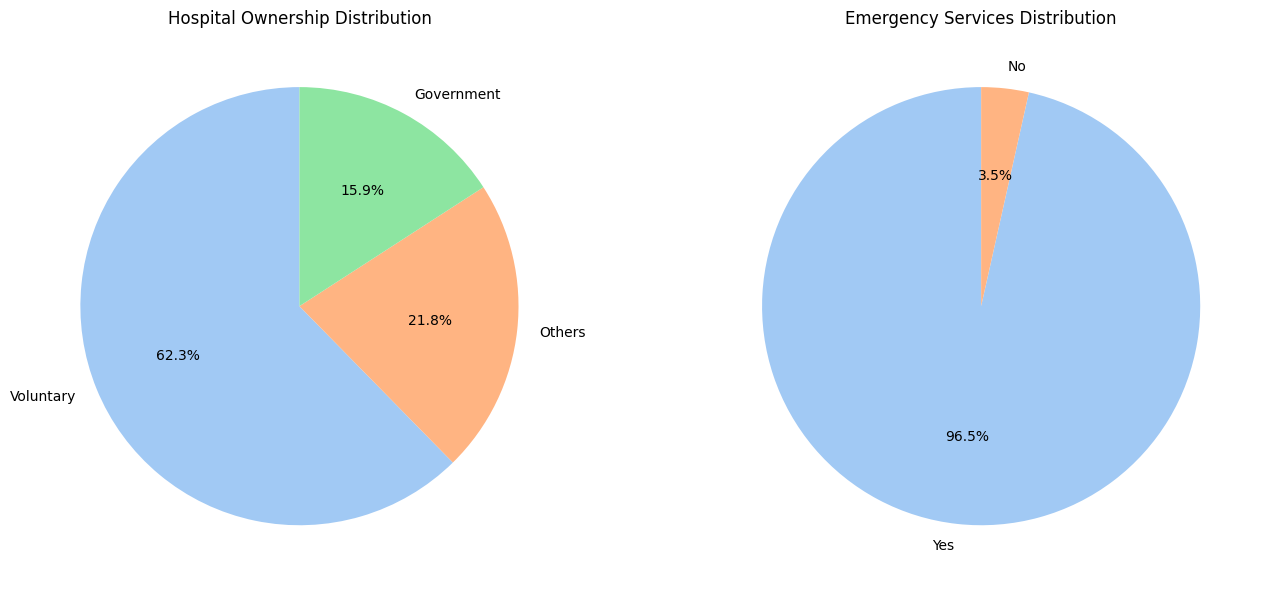

In [38]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))


df['Hospital Ownership'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'), ax=axes[0])
axes[0].set_title('Hospital Ownership Distribution')
axes[0].set_ylabel('')


df['Emergency Services'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'), ax=axes[1])
axes[1].set_title('Emergency Services Distribution')
axes[1].set_ylabel('')


plt.tight_layout()


plt.show()

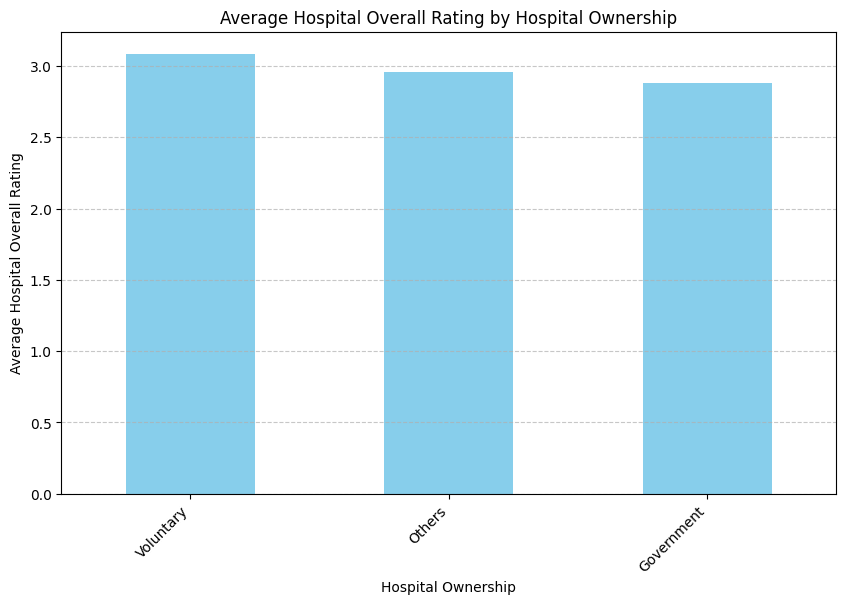

In [39]:
avg_ratings = df.groupby('Hospital Ownership')['Hospital overall rating'].mean(
    ).sort_values(ascending=False)


plt.figure(figsize=(10, 6))
avg_ratings.plot(kind='bar', color='skyblue')
plt.title('Average Hospital Overall Rating by Hospital Ownership')
plt.xlabel('Hospital Ownership')
plt.ylabel('Average Hospital Overall Rating')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)


plt.show()

**Step 5: Insights and Summary**

* It appears the distribution of hospital overall ratings closely resembles a normal distribution, with the majority of hospitals clustered around the mean rating of 3. This indicates that most hospitals tend to fall within the average range, with fewer hospitals receiving very high or very low ratings.

* The average hospital overall ratings exhibit considerable variation across different states. South Dakota (SD) shows the highest average rating, while the District of Columbia (DC) has the lowest.

* A significant number of hospitals fall below the national average in key areas such as safety of care, readmission rates, patient experience, and timeliness of care. **This suggests a need for focused improvement initiatives in these patient-centric aspects of healthcare delivery**.  Comparatively, fewer hospitals fall below average in mortality rates, effectiveness of care, and efficient use of medical imaging, highlighting a performance gap between patient-centric care and other quality measures.

* The data reveals that the majority of hospitals are categorized as "Voluntary" (higher than 60%), signifying non-profit, community-based institutions. Furthermore, higher than 96% report offering emergency services.

* Voluntary hospitals, on average, have a slightly higher overall rating compared to hospitals categorized as "Others" or "Government." While the differences are not drastic, this suggests that the non-profit, community-based structure of voluntary hospitals may contribute to a marginally improved patient experience or quality of care as perceived in overall ratings.


# Task 2: Build machine learning models

**Step 1: Preprocess the Data**

1. Remove Demographic and Unnecessary Columns

In [40]:
df = df.drop(columns=['Provider ID', 'Hospital Name', 'Address', 'City',
                      'State', 'ZIP Code', 'County Name', 'Phone Number'])

2. Convert Hospital overall rating to Binary (0 and 1)

In [41]:
df['Hospital overall rating'] = df['Hospital overall rating'].apply(lambda x: 0 if x in [1, 2, 3] else 1)

3. Create Dummy Variables for Categorical Columns

In [42]:

categorical_cols = df.select_dtypes(include=['object']).columns
numerical_cols = df.select_dtypes(include=['number']).drop(columns=['Hospital overall rating']).columns


preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('num', StandardScaler(), numerical_cols)
    ]
)


X = df.drop(columns=['Hospital overall rating'])
y = df['Hospital overall rating'].values

X_processed = preprocessor.fit_transform(X)

4. Split the Data into Train and Test Sets (70-30 Split)

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.3, random_state=42)

**Step 2: Build Machine Learning Models**

6-1. Naive Bayes Classifier

In [44]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)


y_pred_nb = nb_model.predict(X_test)


print("Naive Bayes Classifier Performance:")
print(classification_report(y_test, y_pred_nb))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_nb))
print("Accuracy:", accuracy_score(y_test, y_pred_nb))

Naive Bayes Classifier Performance:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       664
           1       1.00      0.98      0.99       254

    accuracy                           0.99       918
   macro avg       1.00      0.99      0.99       918
weighted avg       0.99      0.99      0.99       918

Confusion Matrix:
[[664   0]
 [  6 248]]
Accuracy: 0.9934640522875817


6-2. Random Forest Classifier (or any other model)

In [45]:

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)


y_pred_rf = rf_model.predict(X_test)


print("Random Forest Classifier Performance:")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))

Random Forest Classifier Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       664
           1       1.00      1.00      1.00       254

    accuracy                           1.00       918
   macro avg       1.00      1.00      1.00       918
weighted avg       1.00      1.00      1.00       918

Confusion Matrix:
[[664   0]
 [  0 254]]
Accuracy: 1.0


**Step 3: Summarize the classification performance using necessary metrics**

Observations:

1. **Imbalanced Data**: Approximately 72% of the training data belongs to Class 0, indicating a class imbalance. Despite this, both models perform exceptionally well.
2. **Naive Bayes**:
* Achieves high accuracy (99.35%) but misclassifies 6 instances of Class 1 as
 Class 0.
* Slightly lower recall for Class 1 (98%) compared to Class 0 (100%).
3. **Random Forest**:
* Achieves perfect accuracy (100%) with no misclassifications.
* Demonstrates balanced precision, recall, and F1-scores for both classes.

Conclusion:
* The Random Forest Classifier outperforms the Naive Bayes model, achieving perfect classification on the test set.
* Despite the class imbalance, both models generalize well, but the Random Forest is more robust and reliable for this dataset.

# Task 3: Providing Recommendations

**Predict the ratings of new hospitals in hospital_not_yet_rated.csv file using Random forest classifier.**

In [46]:
url = 'https://raw.githubusercontent.com/dearbharat/datasets/refs/heads/main/hospital_not_yet_rated.csv'
df_new = pd.read_csv(url)
df_new.head()

,Provider ID,Hospital Ownership,Emergency Services,Mortality national comparison,Safety of care national comparison,Readmission national comparison,Patient experience national comparison,Effectiveness of care national comparison,Timeliness of care national comparison,Efficient use of medical imaging national comparison,MORT_30_AMI_Score,MORT_30_CABG_Score,MORT_30_COPD_Score,MORT_30_HF_Score,MORT_30_PN_Score,MORT_30_STK_Score,rating_group,READM_30_AMI_Score,READM_30_CABG_Score,READM_30_COPD_Score,READM_30_HF_Score,READM_30_HIP_KNEE_Score,READM_30_HOSP_WIDE_Score,READM_30_PN_Score,READM_30_STK_Score,TIME_OP_21_Score,TIME_OP_5_Score,EFF_EDV_Score,EFF_ED_1b_Score,EFF_ED_2b_Score,EFF_IMM_2_Score,EFF_IMM_3_OP_27_FAC_ADHPCT_Score,EFF_OP_18b_Score,EFF_OP_20_Score,EFF_OP_22_Score,EFF_OP_29_Score,EFF_OP_30_Score,EFF_OP_4_Score,EFF_PC_01_Score,EFF_STK_1_Score,EFF_STK_10_Score,EFF_STK_2_Score,EFF_STK_4_Score,EFF_STK_5_Score,EFF_STK_6_Score,EFF_VTE_1_Score,EFF_VTE_2_Score,EFF_VTE_3_Score,EFF_VTE_5_Score,EFF_VTE_6_Score,EXP_H_CLEAN_STAR_RATING_Score,EXP_H_COMP_1_STAR_RATING_Score,EXP_H_COMP_2_STAR_RATING_Score,EXP_H_COMP_3_STAR_RATING_Score,EXP_H_COMP_4_STAR_RATING_Score,EXP_H_COMP_5_STAR_RATING_Score,EXP_H_COMP_6_STAR_RATING_Score,EXP_H_COMP_7_STAR_RATING_Score,EXP_H_HSP_RATING_STAR_RATING_Score,EXP_H_QUIET_STAR_RATING_Score,EXP_H_RECMND_STAR_RATING_Score,EXP_H_STAR_RATING_Score,SAFETY_COMP_HIP_KNEE_Score,SAFETY_PSI_12_POSTOP_PULMEMB_DVT_Score,SAFETY_PSI_13_POST_SEPSIS_Score,SAFETY_PSI_14_POSTOP_DEHIS_Score,SAFETY_PSI_15_ACC_LAC_Score,SAFETY_PSI_3_ULCER_Score,SAFETY_PSI_4_SURG_COMP_Score,SAFETY_PSI_6_IAT_PTX_Score,SAFETY_PSI_7_CVCBI_Score,SAFETY_PSI_90_SAFETY_Score,SAFETY_HAI_1_SIR_Score,SAFETY_HAI_1a_SIR_Score,SAFETY_HAI_2_SIR_Score,SAFETY_HAI_2a_SIR_Score,SAFETY_HAI_3_SIR_Score,SAFETY_HAI_4_SIR_Score,SAFETY_HAI_5_SIR_Score,SAFETY_HAI_6_SIR_Score,MED_OP_10_Score,MED_OP_11_Score,MED_OP_13_Score,MED_OP_14_Score,MED_OP_8_Score,MED_OP_9_Score
0,520139,Voluntary,Yes,1,1,2,2,2,2,1,-12.500000,-3.331371,-8.2,-13.6,-14.1,-15.20000,2,15.900000,14.40761,21.2,20.5,5.400000,15.0,16.3,11.800000,-43.000000,-5.000000,-1,-212,-76,98,99,-161,-18,0,100.000000,100.000000,99.00000,-4.000000,100.00000,97.858863,99.069878,89.591422,98.19798,100.000000,100,100.00000,100.000000,100.000000,0.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.000000,4.000000,3.000000,4.000000,3.000000,4.000000,4.00000,-3.200000,-3.580000,-7.190000,-2.120000,-1.88,-0.14,-135.660000,-0.33,-0.12,-0.83,-0.408000,-0.502000,-0.192000,-0.396000,-0.37100,-1.278000,0.000000,-0.56600,-3.100000,-0.500000,-6.100000,-2.900000,-41.000000,-6.100000
1,520189,Government,Yes,2,1,2,2,2,2,1,-13.800000,-3.331371,-8.1,-11.8,-16.1,-16.60000,2,16.893574,14.40761,18.8,22.7,4.700000,14.2,18.3,12.800000,-32.000000,-6.000000,-1,-198,-64,100,98,-127,-9,0,100.000000,100.000000,98.00000,-1.000000,100.00000,97.858863,99.069878,89.591422,98.19798,100.000000,100,99.00000,94.000000,95.000000,-2.030869,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.00000,-3.300000,-5.010000,-9.200000,-2.170000,-1.32,-1.40,-127.390000,-0.42,-0.14,-0.92,-0.514000,-1.286000,-0.159000,-0.505000,-1.16900,0.000000,-0.987212,-0.83400,-6.700000,-0.300000,-5.400000,-1.900000,-41.100000,-5.300000
2,370029,Government,No,1,1,1,1,1,2,1,-14.054091,-3.331371,-7.9,-11.8,-17.0,-15.90000,1,16.893574,14.40761,19.6,23.1,4.615622,15.2,16.8,12.900000,-30.000000,-11.000000,0,-207,-67,100,94,-95,-5,-1,72.820855,80.306699,92.00000,0.000000,85.00000,97.858863,99.069878,89.591422,98.19798,95.628617,91,95.00000,93.223475,92.863594,-2.030869,3.000000,3.000000,5.000000,4.000000,4.000000,4.000000,4.000000,2.000000,4.000000,4.000000,3.000000,4.00000,-3.042904,-5.170000,-10.254041,-2.318955,-1.64,-0.44,-136.771392,-0.40,-0.17,-0.94,-0.540039,-0.529125,-0.483207,-0.582103,-0.96398,-0.871177,-0.987212,0.00000,-18.700000,-13.900000,-4.716942,-2.964405,-39.964766,-8.300000
3,370032,Others,Yes,1,2,1,0,1,1,1,-15.700

In [47]:

df_new = df_new.drop(columns=['Provider ID', 'Hospital Name', 'Address', 'City',
                              'State', 'ZIP Code', 'County Name', 'Phone Number'], errors='ignore')

In [48]:

categorical_cols_new = df_new.select_dtypes(include=['object']).columns


In [49]:

df_new_processed = preprocessor.transform(df_new)

In [50]:

y_pred_new = rf_model.predict(df_new_processed)

In [51]:

df_new['Predicted Hospital Rating'] = y_pred_new


print(df_new[['Predicted Hospital Rating']].head())

   Predicted Hospital Rating
0                          1
1                          1
2                          0
3                          0
4                          0


**Recommendations for hospitals to improve their ratings based on the feature importance analysis of the model.**

                                        Feature  Importance
18                            num__rating_group    0.406100
24                num__READM_30_HOSP_WIDE_Score    0.045833
8   num__Patient experience national comparison    0.035845
73              num__SAFETY_PSI_90_SAFETY_Score    0.029244
59          num__EXP_H_COMP_7_STAR_RATING_Score    0.026424
60      num__EXP_H_HSP_RATING_STAR_RATING_Score    0.024985
53          num__EXP_H_COMP_1_STAR_RATING_Score    0.024677
63                 num__EXP_H_STAR_RATING_Score    0.022957
7          num__Readmission national comparison    0.020994
57          num__EXP_H_COMP_5_STAR_RATING_Score    0.019794


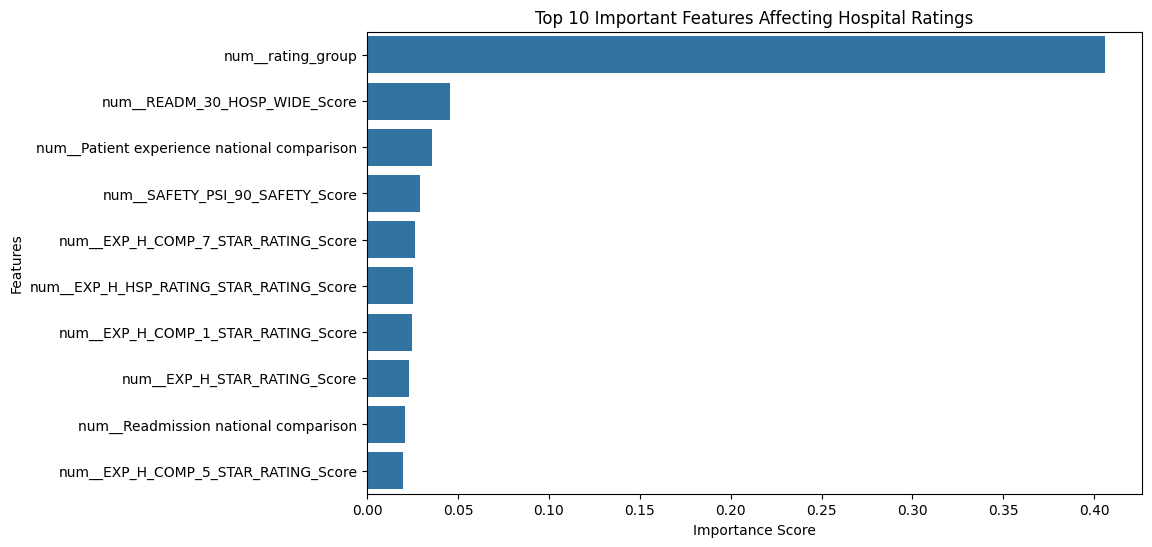

In [52]:

feature_importances = rf_model.feature_importances_


feature_names = preprocessor.get_feature_names_out()


importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})


importance_df = importance_df.sort_values(by='Importance', ascending=False)


print(importance_df.head(10))


plt.figure(figsize=(10, 6))
sns.barplot(x=importance_df['Importance'][:10], y=importance_df['Feature'][:10])
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.title("Top 10 Important Features Affecting Hospital Ratings")
plt.show()


Based on the feature importance output, the most influential factors affecting hospital ratings include:

1. **rating_group (0.4061)** – This is the most significant predictor, indicating that the overall rating grouping is a strong determinant of hospital ratings.
2. **READM_30_HOSP_WIDE_Score (0.0458)** – Readmission rates across all conditions impact hospital ratings. High readmission rates suggest lower-quality care.
3. **Patient experience national comparison (0.0358)** – Patient-reported experiences significantly affect ratings. Poor experiences could stem from factors like staff responsiveness or communication.
4. **SAFETY_PSI_90_SAFETY_Score (0.0292)** – A composite measure of patient safety indicators, which reflects the hospital’s ability to prevent complications and medical errors.
5. **EXP_H_COMP_7_STAR_RATING_Score (0.0264)** – This likely pertains to patient satisfaction related to provider communication, which influences hospital perception.
6. **EXP_H_HSP_RATING_STAR_RATING_Score (0.0250)** – General hospital rating given by patients, reinforcing the link between experience and ratings.
7. **EXP_H_COMP_1_STAR_RATING_Score (0.0247)** – Patient-reported communication with nurses, which is a key service quality indicator.
8. **EXP_H_STAR_RATING_Score (0.0230)** – Overall hospital experience scores from patients, showing a direct correlation with ratings.
9. **Readmission national comparison (0.0210)** – Another readmission-related metric, supporting the idea that reducing readmission rates could improve ratings.
10. **EXP_H_COMP_5_STAR_RATING_Score (0.0198)** – Possibly related to staff responsiveness or cleanliness, impacting patient satisfaction.


**Insights and Summary**

* It appears the distribution of hospital overall ratings closely resembles a normal distribution, with the majority of hospitals clustered around the mean rating of 3. This indicates that most hospitals tend to fall within the average range, with fewer hospitals receiving very high or very low ratings.

* The average hospital overall ratings exhibit considerable variation across different states. South Dakota (SD) shows the highest average rating, while the District of Columbia (DC) has the lowest.

* A significant number of hospitals fall below the national average in key areas such as safety of care, readmission rates, patient experience, and timeliness of care. **This suggests a need for focused improvement initiatives in these patient-centric aspects of healthcare delivery**.  Comparatively, fewer hospitals fall below average in mortality rates, effectiveness of care, and efficient use of medical imaging, highlighting a performance gap between patient-centric care and other quality measures.

* The data reveals that the majority of hospitals are categorized as "Voluntary" (higher than 60%), signifying non-profit, community-based institutions. Furthermore, higher than 96% report offering emergency services.

* Voluntary hospitals, on average, have a slightly higher overall rating compared to hospitals categorized as "Others" or "Government." While the differences are not drastic, this suggests that the non-profit, community-based structure of voluntary hospitals may contribute to a marginally improved patient experience or quality of care as perceived in overall ratings.
